In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.constants import M_sun
import numpy as np
import os
import sys
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

sys.path.append('../pipeline_scripts/')
from pipeline_main import sink_positions, pipeline, serialize_directory, sinks


# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 20}
mpl.rc('font', **font)


In [2]:
data = pipeline(snap = 341, run = f'sink{122}fmr01', loading_bar = True, sink_id = 122)

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 5026/5026 [00:54<00:00, 91.40it/s] 


In [3]:
sink6_pos = np.array([-0.34932962, 0.04147947, -0.23333947])
np.linalg.norm(sink_positions[13] - sink6_pos)
dist = sink_positions[13] - sink6_pos
dist[dist > 0.5] -= 1
np.linalg.norm(dist) *  data.sn.scaling.l / data.sn.cgs.pc

3.2671871379595303

In [4]:
sink6_pos = np.array([0.37825207,-0.06472347, -0.29809004])

sink13_poos = np.array([0.45815791,-0.01412231, -0.23385437])
print(np.linalg.norm(sink13_poos - sink6_pos), sink13_poos - sink6_pos)
np.linalg.norm(sink_positions[13] - sink6_pos)
dist = sink_positions[13] - sink6_pos
dist[dist > 0.5] -= 1
np.linalg.norm(dist) 

0.11433128163280643 [0.07990584 0.05060116 0.06423567]


0.586126115876137

In [5]:
plot_data = serialize_directory(filename = 'core_panel_data_1000.pkl', store = False)

In [6]:
plot_data[6].shape

(1000, 1000)

In [7]:
scale_bar1 = 2062.64806 # 0.1 parsec
scale_bar = 1000

In [8]:
for sink in sinks:
    print(f'sink{sink}  {np.log10(plot_data[sink] * data.cgs_density).min()}    {np.log10(plot_data[sink] * data.cgs_density).max()}')

sink6  -2.8630650612457043    2.1720140204500207
sink13  -3.37190959925697    1.78888643948035
sink14  -2.8168679554396396    2.7968865202332984
sink25  -2.313726088759898    2.9764016458482074
sink82  -3.327699496880768    2.8630381710433106
sink122  -2.9019416383740895    1.825541478017814
sink162  -2.2419017003833273    2.4172207304995386
sink180  -3.638331224069985    2.0183217487286096
sink225  -2.5373427138233184    2.1120208959792808


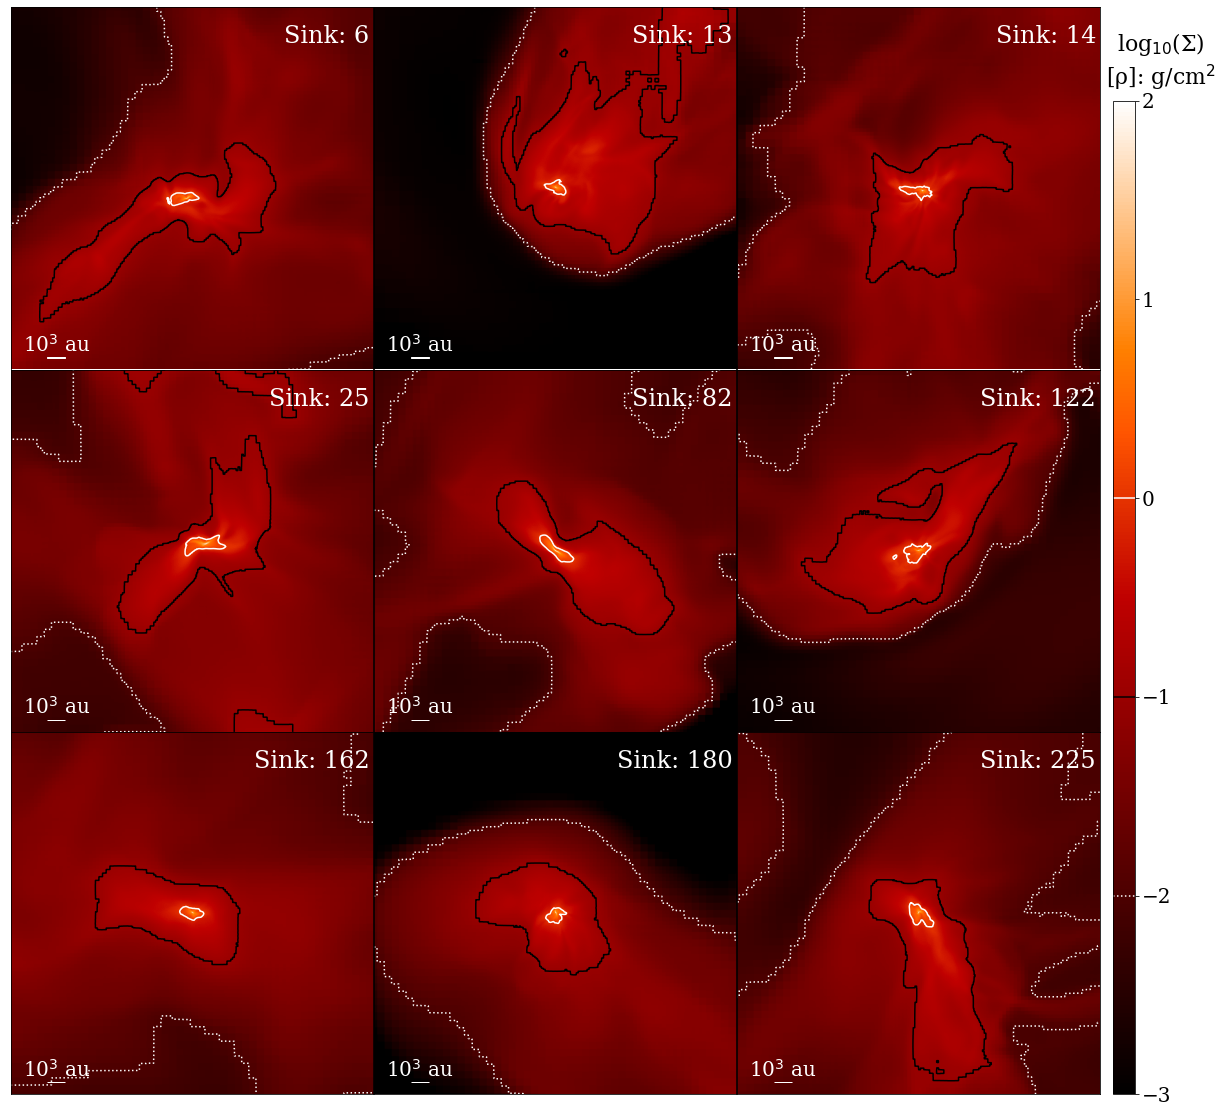

In [9]:
extent = 2e4 
res = 1000


X, Y = [np.linspace(-extent //2, extent // 2, res) for _ in range(2)]
xx,yy = np.meshgrid(X, Y)


fig, axs = plt.subplots(3,3, figsize = (20,20))

for ax, sink in zip(axs.flatten(), sinks):
    ax.set_xticks([]); ax.set_yticks([])
    cs = ax.imshow(np.log10(plot_data[sink] * data.cgs_density),  extent = (-extent//2, extent//2, -extent//2, extent/2), cmap = 'gist_heat', vmin = -3, vmax=2, origin = 'lower')
    ct = ax.contour(xx, yy, np.log10(plot_data[sink] * data.cgs_density), [-2, -1, 0], colors = ['white', 'black', 'white'], linestyles = ['dotted', 'solid', 'solid'])


    scalebar = AnchoredSizeBar(ax.transData, scale_bar, '10$^3$ au', 'lower left', 
                        pad=0.5,
                        color='white',
                        frameon=False,
                        fontproperties = fm.FontProperties(size=20),
                        size_vertical=1,
                        label_top=True)

    ax.add_artist(scalebar)
    ax.text(0.99, 0.95, f'Sink: {sink}', transform=ax.transAxes, ha='right', va='top', fontsize = 24, color = 'white')
cbaxes = fig.add_axes([0.90, 0.125, 0.015, 0.69])
cbar = fig.colorbar(cs, cax = cbaxes)
cbar.add_lines(ct)
[line.set_linestyles(ct.linestyles)  for line in cbar.lines]

cbar.set_label('log$_{10}$(Σ)\n[ρ]: g/cm$^2$', labelpad = -10, y = 1.07, rotation = 0, fontsize = 22)

fig.subplots_adjust(wspace=-0.067, hspace=0)
fig.savefig('/groups/astro/kxm508/codes/python_dispatch/graphics/all_cores', facecolor = 'w', bbox_inches='tight', dpi = 500)